## Image Processing 03|04

Wirapat Prigphet (Gene) 620510618 <br/>
Suppapich Seetasith (Yale) 620510626 <br/>
Pakin Siwatammarat (Pirch) 620510677

### Import Libraries

In [ ]:
# !apt install imagemagick
# !pip install imageio

In [ ]:
import os
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from math import ceil
from matplotlib import rc
from matplotlib.animation import FuncAnimation
from tqdm.notebook import tqdm

### Histogram equalization


####Usefulness 


This method gives higher contrast to images. So this method is useful for scientific to make image color shades clearer and to better detail in photographs. For example, viewing of bone structure in x-ray images.

#### Read image 

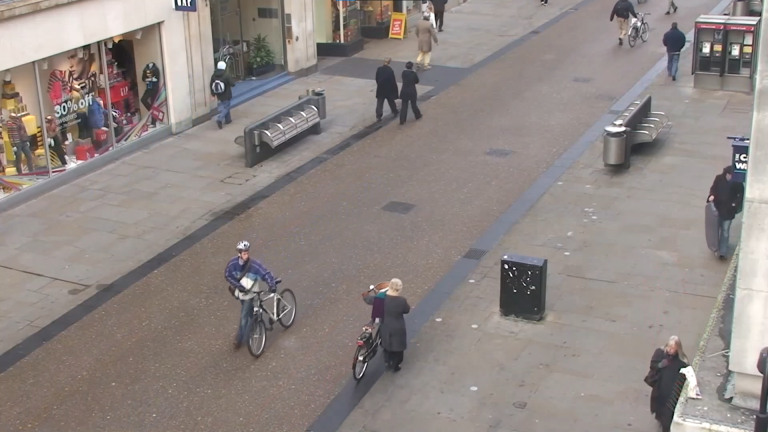

In [ ]:
image = cv2.imread("kondern.png")
scale_percent = 40 
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
cv2_imshow(image)

#### Histograms Equalization

In [ ]:
b, g, r = cv2.split(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(5, 5))
b = clahe.apply(b)
g = clahe.apply(g)
r = clahe.apply(r)
histrogram_equalization_image = cv2.merge([b, g, r])

#### Display Result

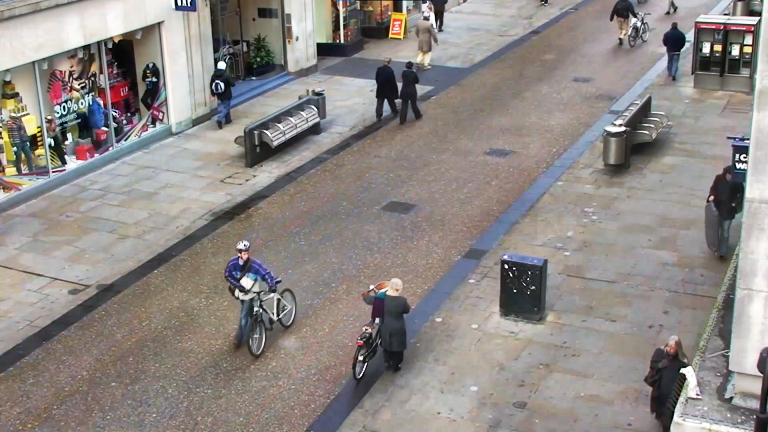

In [ ]:
cv2_imshow(histrogram_equalization_image)

Explanation : image has higher contrast.

#### Plot Histrogram

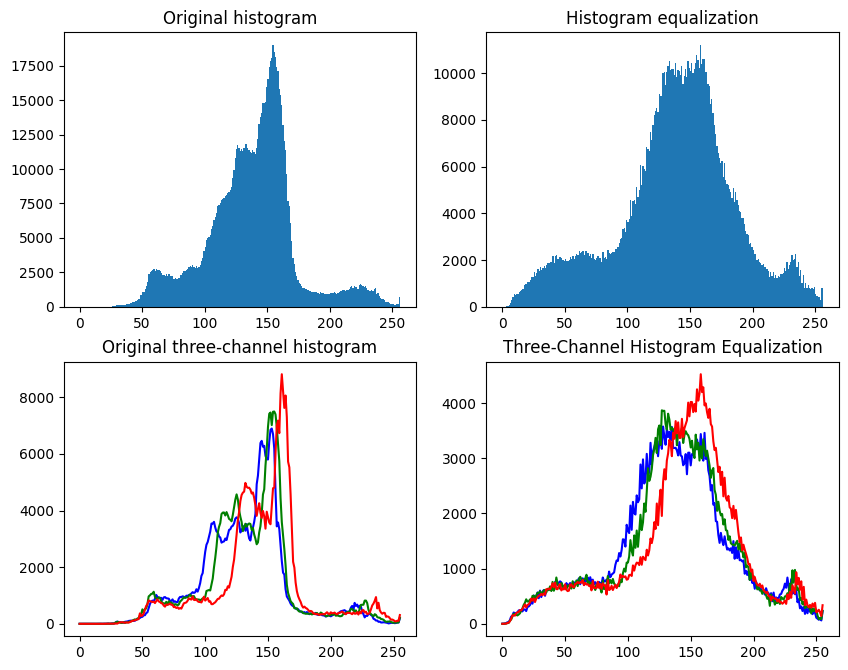

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
plt.subplot(2,2,1)
plt.title("Original histogram")
plt.hist(image.ravel(), 256, [0, 256])
colors = ["b", "g", "r"]
plt.subplot(2,2,3)
plt.title("Original three-channel histogram")
for i, color in enumerate(colors):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = color)

plt.subplot(2,2,4)
plt.title("Three-Channel Histogram Equalization")
for i, color in enumerate(colors):
    hist = cv2.calcHist([histrogram_equalization_image], [i], None, [256], [0, 256])
    plt.plot(hist, color = color)
plt.subplot(2,2,2)
plt.title("Histogram equalization")
plt.hist(histrogram_equalization_image.ravel(), 256, [0, 256])
plt.show()

Explanation : The histogram of the image is a kind of processing on the contrast effect of the image, which aims to make the overall effect of the image uniform, and the point between each pixel level between three colors chanel(RGB) is more uniform.

### Reference

**Histogram equalization in Python-Opencv - Programmer Sought. (2014).** Retrieved July 26, 2021, from Programmersought.com website: https://www.programmersought.com/article/8689944196/
<br/><br/>
‌cryu854. (2020, December 14). **cryu854/OpticalFlow: Consist of four different approaches for generating optical flow and can be demonstrated in Colab.** Retrieved July 26, 2021, from GitHub website: https://github.com/cryu854/OpticalFlow
<br/><br/>
‌theAIGuysCode. (2020, September 27). **theAIGuysCode/yolov4-deepsort: Object tracking implemented with YOLOv4, DeepSort, and TensorFlow**. Retrieved July 26, 2021, from GitHub website: https://github.com/theAIGuysCode/yolov4-deepsort
<br/><br/>
Lin, C. (2019, April 24). **Introduction to Motion Estimation with Optical Flow.** Retrieved July 26, 2021, from AI & Machine Learning Blog website: https://nanonets.com/blog/optical-flow/
<br/><br/>